In [2]:
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sys
sys.path.insert(0, '/Users/palmerio/Dropbox/Plotting_GUI/Src')
import plotting_functions as pf
plt.style.use('presentation')

In [3]:
filename = 'GBM_cat_complete.txt'
#df = np.genfromtxt(filename, sep='|')
df = pd.read_csv(filename, sep='|', header=3)
superfluous_cols = ['#%', 'Unnamed: 212']
for col in superfluous_cols:
    del df[col]

In [4]:
df.rename(columns=lambda x:x.strip(), inplace=True)
print(df.columns)
df['pflx_best_fitting_model']=df['pflx_best_fitting_model'].map(lambda x:x.strip())

Index(['name', 't90', 't90_error', 'fluence', 'fluence_error', 'flux_1024',
       'flux_1024_error', 'flux_64', 'flux_64_error', 'flnc_band_ampl',
       ...
       'flnc_sbpl_ergflux_error', 'flnc_sbpl_ergflnc',
       'flnc_sbpl_ergflnc_error', 'flnc_sbpl_redchisq', 'flnc_sbpl_redfitstat',
       'flnc_sbpl_dof', 'flnc_sbpl_statistic', 'bcatalog', 'scatalog',
       'last_modified'],
      dtype='object', length=211)


In [5]:
band_keys = ['_'.join(['pflx_band', param, err]).strip('_') for param, err in product(['ampl','epeak', 'alpha','beta'], ['','pos_err','neg_err'])]
print(band_keys)
for key in band_keys:
    df[key] = pd.to_numeric(df[key], errors='coerce')
df['pflx_band_alpha'] = -df['pflx_band_alpha'] 
df['pflx_band_beta'] = -df['pflx_band_beta'] 

['pflx_band_ampl', 'pflx_band_ampl_pos_err', 'pflx_band_ampl_neg_err', 'pflx_band_epeak', 'pflx_band_epeak_pos_err', 'pflx_band_epeak_neg_err', 'pflx_band_alpha', 'pflx_band_alpha_pos_err', 'pflx_band_alpha_neg_err', 'pflx_band_beta', 'pflx_band_beta_pos_err', 'pflx_band_beta_neg_err']


In [6]:
long = (df['t90'] >= 2)
complete = (df['flux_batse_1024'] >= 0.9)
long_and_complete = long & complete
Band_best_fit = (df['pflx_best_fitting_model'] == 'pflx_band')
cond_a = (df['pflx_band_alpha_pos_err'] <= 0.4) & (df['pflx_band_alpha_neg_err'] <= 0.4)
cond_b = (df['pflx_band_beta_pos_err'] <= 1.0) & (df['pflx_band_beta_neg_err'] <= 1.0)
cond_c = (df['pflx_band_ampl_pos_err']/df['pflx_band_ampl'] <= 0.4) & (df['pflx_band_ampl_neg_err']/df['pflx_band_ampl'] <= 0.4)
cond_d = (df['pflx_band_epeak_pos_err']/df['pflx_band_epeak'] <= 0.4) & (df['pflx_band_epeak_neg_err']/df['pflx_band_epeak'] <= 0.4)

df_lac = df[long_and_complete].dropna()
df_best = df[long_and_complete & Band_best_fit]
df_good = df[long_and_complete & cond_a & cond_b & cond_c & cond_d]
print('All:',len(df))
print('long:',len(df[long]))
print('long and complete:',len(df_lac))
print('Best:',len(df_best))
print('Good:',len(df_good))
# df_best

All: 1944
long: 1624
long and complete: 1024
Best: 59
Good: 310


(-2, 3)

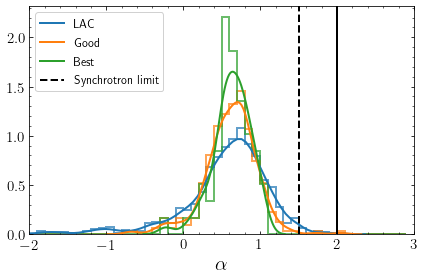

In [65]:
bins_alpha = np.arange(-2, 3., 0.1)

plt.hist(df_lac['pflx_band_alpha'], bins=bins_alpha, density=True, alpha=0.7, histtype='step', linewidth=2)
plt.hist(df_good['pflx_band_alpha'], bins=bins_alpha, density=True, alpha=0.7, histtype='step', linewidth=2)
plt.hist(df_best['pflx_band_alpha'], bins=bins_alpha, density=True, alpha=0.7, histtype='step', linewidth=2)
sns.kdeplot(df_lac['pflx_band_alpha'], color='C0', ax = plt.gca(), label='LAC')
sns.kdeplot(df_good['pflx_band_alpha'], color='C1', ax = plt.gca(), label = 'Good')
sns.kdeplot(df_best['pflx_band_alpha'], color='C2', ax = plt.gca(), label = 'Best')
plt.axvline(2,color='k')
plt.axvline(1.5,color='k', ls='--', label='Synchrotron limit')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.xlim(-2,3)

(0, 10)

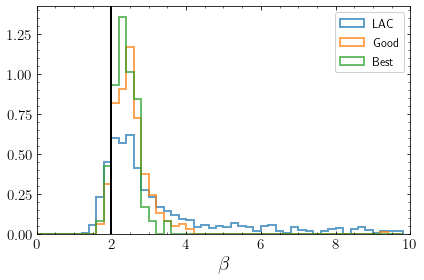

In [66]:
bins_beta = np.arange(0., 10.0, 0.2)

plt.hist(df_lac['pflx_band_beta'], bins=bins_beta, density=True, alpha=0.7, label='LAC', histtype='step', linewidth=2)
plt.hist(df_good['pflx_band_beta'], bins=bins_beta, density=True, alpha=0.7, label='Good', histtype='step', linewidth=2)
plt.hist(df_best['pflx_band_beta'], bins=bins_beta, density=True, alpha=0.7, label='Best', histtype='step', linewidth=2)
plt.axvline(2, color='k')
plt.xlabel(r'$\beta$')
plt.legend()
plt.xlim(0,10)

/Users/palmerio/miniconda3/envs/python3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


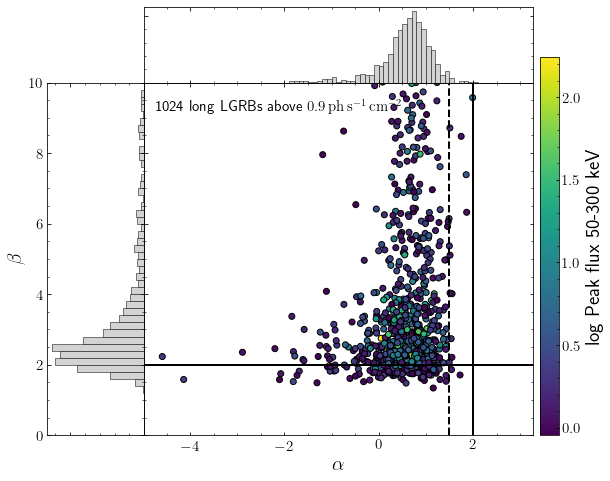

In [67]:
fig, axlist = pf.cool_hist2d(df_lac['pflx_band_alpha'], df_lac['pflx_band_beta'], 
                             c=np.log10(df_lac['flux_batse_1024']),
                             xlabel=r'$\alpha$', ylabel=r'$\beta$',
                             plot_left_kdeplot=False, plot_top_kdeplot=False,
                             top_hist_kwargs={'bins':bins_alpha, 'color':'lightgrey','edgecolor':'k', 'linewidth':0.5},
                             left_hist_kwargs={'bins':bins_beta, 'color':'lightgrey','edgecolor':'k', 'linewidth':0.5},
                             cblabel=r'log Peak flux 50-300 keV')
axlist['left'].set_ylim(0,10)
axlist['center'].text(0.03, 0.92, f'{len(df_lac)} long LGRBs above ' + r'$\rm 0.9\,ph\,s^{-1}\,cm^{-2}$',
                      transform=axlist['center'].transAxes, fontsize=15)
axlist['center'].axvline(2., color='k')
axlist['center'].axvline(1.5, ls='--', color='k')
axlist['center'].axhline(2., color='k')
plt.show()

/Users/palmerio/miniconda3/envs/python3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


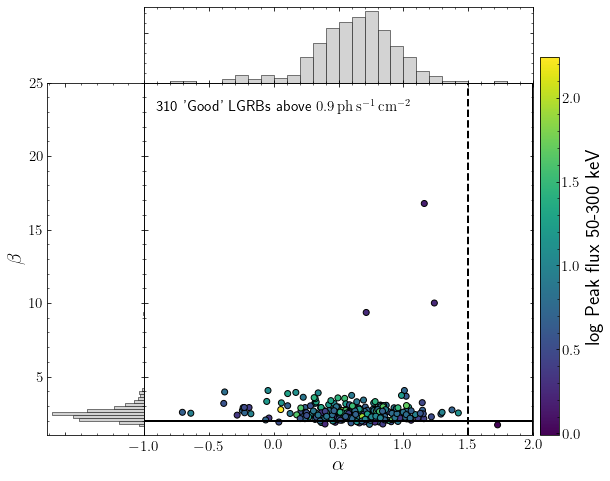

In [92]:
fig, axlist = pf.cool_hist2d(df_good['pflx_band_alpha'], df_good['pflx_band_beta'], 
                             c=np.log10(df_good['flux_batse_1024']),
                             xlabel=r'$\alpha$', ylabel=r'$\beta$',
                             plot_left_kdeplot=False, plot_top_kdeplot=False,
                             top_hist_kwargs={'bins':bins_alpha, 'color':'lightgrey','edgecolor':'k', 'linewidth':0.5},
                             left_hist_kwargs={'bins':bins_beta, 'color':'lightgrey','edgecolor':'k', 'linewidth':0.5},
                             cblabel=r'log Peak flux 50-300 keV')
axlist['left'].set_ylim(1,25)
axlist['center'].set_xlim(-1,2)
axlist['center'].text(0.03, 0.92, f"{len(df_good)} 'Good' LGRBs above " + r'$\rm 0.9\,ph\,s^{-1}\,cm^{-2}$',
                      transform=axlist['center'].transAxes, fontsize=15)
axlist['center'].axvline(2., color='k')
axlist['center'].axvline(1.5, ls='--', color='k')
axlist['center'].axhline(2., color='k')
plt.show()

/Users/palmerio/miniconda3/envs/python3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


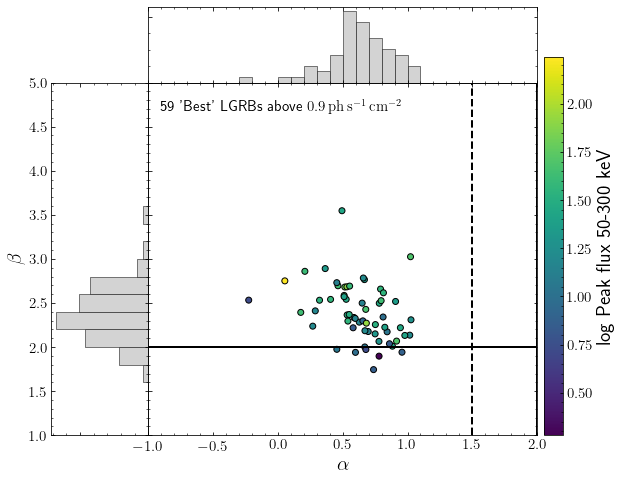

In [71]:
fig, axlist = pf.cool_hist2d(df_best['pflx_band_alpha'], df_best['pflx_band_beta'], 
                             c=np.log10(df_best['flux_batse_1024']),
                             xlabel=r'$\alpha$', ylabel=r'$\beta$',
                             plot_left_kdeplot=False, plot_top_kdeplot=False,
                             top_hist_kwargs={'bins':bins_alpha, 'color':'lightgrey','edgecolor':'k', 'linewidth':0.5},
                             left_hist_kwargs={'bins':bins_beta, 'color':'lightgrey','edgecolor':'k', 'linewidth':0.5},
                             cblabel=r'log Peak flux 50-300 keV')
axlist['left'].set_ylim(1,5)
axlist['center'].set_xlim(-1,2)
axlist['center'].text(0.03, 0.92, f"{len(df_best)} 'Best' LGRBs above " + r'$\rm 0.9\,ph\,s^{-1}\,cm^{-2}$',
                      transform=axlist['center'].transAxes, fontsize=15)
axlist['center'].axvline(2., color='k')
axlist['center'].axvline(1.5, ls='--', color='k')
axlist['center'].axhline(2., color='k')
plt.show()

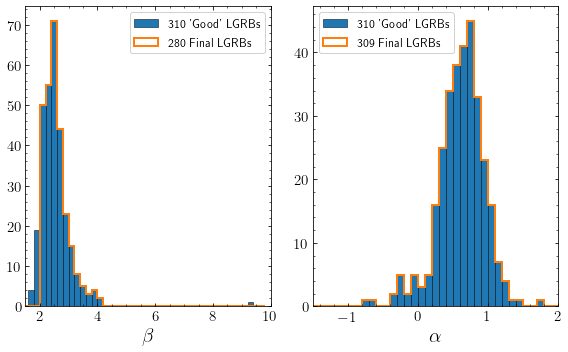

In [95]:
valid_beta = (df_good['pflx_band_beta'] > 2) & (df_good['pflx_band_beta'] < 5)
df_final_beta = df_good[valid_beta]
fig, axes = plt.subplots(1,2, figsize=(8,5))
axes[0].hist(df_good['pflx_band_beta'], bins=bins_beta, label=f"{len(df_good)} 'Good' LGRBs",
             edgecolor='k', linewidth=0.5)
axes[0].hist(df_final_beta['pflx_band_beta'], bins=bins_beta, label=f"{len(df_final_beta)} Final LGRBs",
             histtype='step', linewidth=2)
axes[0].legend()
axes[0].set_xlabel(r'$\beta$')
axes[0].set_xlim(1.5,10)



valid_alpha = (df_good['pflx_band_alpha'] < 2)
df_final_alpha = df_good[valid_alpha]
axes[1].hist(df_good['pflx_band_alpha'], bins=bins_alpha, label=f"{len(df_good)} 'Good' LGRBs",
             edgecolor='k', linewidth=0.5)
axes[1].hist(df_final_alpha['pflx_band_alpha'], bins=bins_alpha, label=f"{len(df_final_alpha)} Final LGRBs",
             histtype='step', linewidth=2)
axes[1].legend()
axes[1].set_xlim(-1.5,2)
axes[1].set_xlabel(r'$\alpha$')
plt.show()

7
310


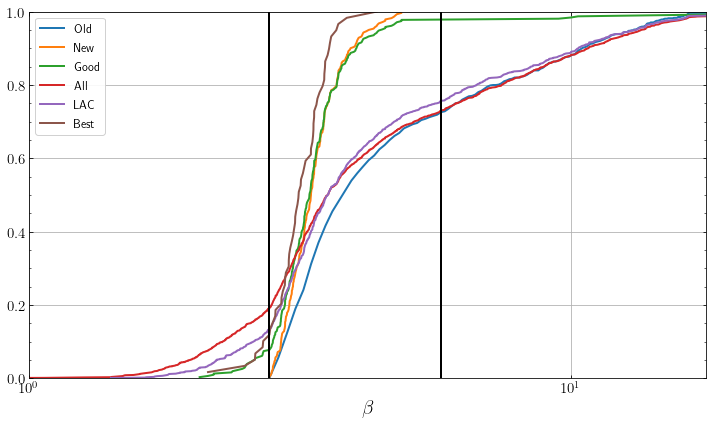

In [121]:
sbeta_final, b_cdf_final = pf.unbinned_empirical_cdf(df_final_beta['pflx_band_beta'])

with open('good_beta_cdf.txt','w') as f:
    f.write('# beta, cdf\n')
    for _beta, _cdf in zip(sbeta_final, b_cdf_final):
        f.write("{:.5e} {:.5e}\n".format(_beta, _cdf))

sbeta_good, b_cdf_good = pf.unbinned_empirical_cdf(df_good['pflx_band_beta'])
sbeta_best, b_cdf_best = pf.unbinned_empirical_cdf(df_best['pflx_band_beta'])
sbeta_lac, b_cdf_lac = pf.unbinned_empirical_cdf(df_lac['pflx_band_beta'])
sbeta_all, b_cdf_all = pf.unbinned_empirical_cdf(df['pflx_band_beta'].dropna())


beta_cdf_old = pd.read_csv('beta_GBM.txt', header=3, sep='\t',names=['beta','cdf'])
# this is to make the plot in the same format as the other cdfs
beta_cdf_old['beta'] = -beta_cdf_old['beta']
beta_cdf_old['cdf'] = 1-beta_cdf_old['cdf']

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(beta_cdf_old['beta'],beta_cdf_old['cdf'], label='Old')
ax.plot(sbeta_final, b_cdf_final, label='New')
ax.plot(sbeta_good, b_cdf_good, label='Good')
ax.plot(sbeta_all, b_cdf_all, label='All')
ax.plot(sbeta_lac, b_cdf_lac, label='LAC')
ax.plot(sbeta_best, b_cdf_best, label='Best')
ax.axvline(2,color='k')
ax.axvline(5,color='k')
ax.grid(True)
ax.legend(loc=2)
ax.set_xlabel(r'$\beta$')
ax.set_xlim(1,20.5)
ax.set_ylim(0,1)
ax.set_xscale('symlog')
print(len(df_good[(df_good['pflx_band_beta']>5)]['pflx_band_beta']))
print(len(df_good['pflx_band_beta']))

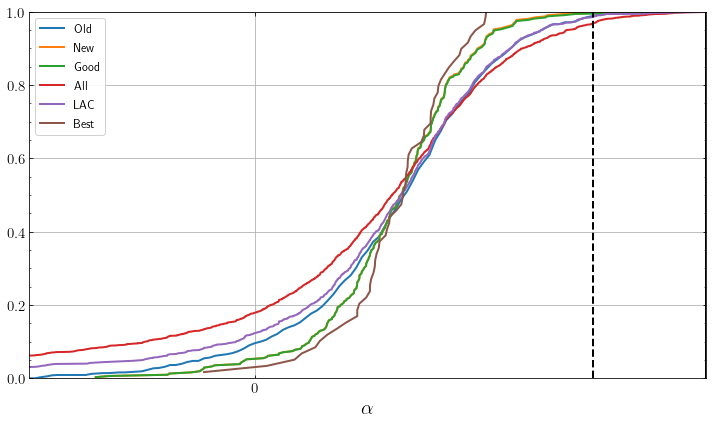

In [118]:
salpha_final, a_cdf_final = pf.unbinned_empirical_cdf(df_final_alpha['pflx_band_alpha'])

with open('good_alpha_cdf.txt','w') as f:
    f.write('# alpha, cdf\n')
    for _alpha, _cdf in zip(salpha_final, a_cdf_final):
        f.write("{:.5e} {:.5e}\n".format(_alpha, _cdf))

salpha_good, a_cdf_good = pf.unbinned_empirical_cdf(df_good['pflx_band_alpha'])
salpha_best, a_cdf_best = pf.unbinned_empirical_cdf(df_best['pflx_band_alpha'])
salpha_lac, a_cdf_lac = pf.unbinned_empirical_cdf(df_lac['pflx_band_alpha'])
salpha_all, a_cdf_all = pf.unbinned_empirical_cdf(df['pflx_band_alpha'].dropna())


alpha_cdf_old = pd.read_csv('alpha_GBM.txt', header=3, sep='\t',names=['alpha','cdf'])
# this is to make the plot in the same format as the other cdfs
alpha_cdf_old['alpha'] = -alpha_cdf_old['alpha']
alpha_cdf_old['cdf'] = 1-alpha_cdf_old['cdf']

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(alpha_cdf_old['alpha'],alpha_cdf_old['cdf'], label='Old')
ax.plot(salpha_final, a_cdf_final, label='New')
ax.plot(salpha_good, a_cdf_good, label='Good')
ax.plot(salpha_all, a_cdf_all, label='All')
ax.plot(salpha_lac, a_cdf_lac, label='LAC')
ax.plot(salpha_best, a_cdf_best, label='Best')
ax.axvline(2,color='k')
ax.axvline(1.5,color='k', ls='--')
ax.grid(True)
ax.legend(loc=2)
ax.set_xlabel(r'$\alpha$')
ax.set_xlim(-1,2)
ax.set_ylim(0,1)
ax.set_xscale('symlog')

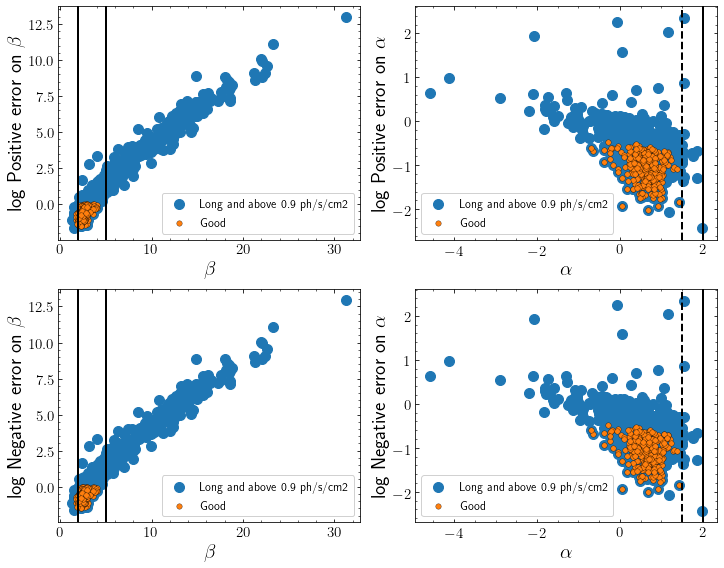

In [142]:
# To check if the GRBs with high values for beta have high errors or not on these values
# Note: the 7 GRBs with beta > 5 in the 'good' sample have errors=0 on beta because it was fixed during the fit
fig, axes = plt.subplots(2,2, figsize=(10,8))
axes[0,0].scatter(df_lac['pflx_band_beta'], np.log10(df_lac['pflx_band_beta_pos_err']), label='Long and above 0.9 ph/s/cm2', marker='o', s=100)
axes[0,0].scatter(df_good['pflx_band_beta'], np.log10(df_good['pflx_band_beta_pos_err']), label='Good', marker='o', s=30, edgecolor='k',linewidth=0.3)
axes[1,0].scatter(df_lac['pflx_band_beta'], np.log10(df_lac['pflx_band_beta_neg_err']), label='Long and above 0.9 ph/s/cm2', marker='o', s=100)
axes[1,0].scatter(df_good['pflx_band_beta'], np.log10(df_good['pflx_band_beta_neg_err']), label='Good', marker='o', s=30, edgecolor='k',linewidth=0.3)

axes[0,1].scatter(df_lac['pflx_band_alpha'], np.log10(df_lac['pflx_band_alpha_pos_err']), label='Long and above 0.9 ph/s/cm2', marker='o', s=100)
axes[0,1].scatter(df_good['pflx_band_alpha'], np.log10(df_good['pflx_band_alpha_pos_err']), label='Good', marker='o', s=30, edgecolor='k',linewidth=0.3)
axes[1,1].scatter(df_lac['pflx_band_alpha'], np.log10(df_lac['pflx_band_alpha_neg_err']), label='Long and above 0.9 ph/s/cm2', marker='o', s=100)
axes[1,1].scatter(df_good['pflx_band_alpha'], np.log10(df_good['pflx_band_alpha_neg_err']), label='Good', marker='o', s=30, edgecolor='k',linewidth=0.3)

for ax in axes.flatten():
    ax.axvline(2, color='k')
    ax.legend()
    
for ax in axes[:,0]:
    ax.axvline(5, color='k')
    ax.set_xlabel(r'$\beta$')
    
for ax in axes[:,1]:
    ax.axvline(1.5, ls='--', color='k')
    ax.set_xlabel(r'$\alpha$')

axes[0,0].set_ylabel(r'log Positive error on $\beta$')
axes[0,1].set_ylabel(r'log Positive error on $\alpha$')
axes[1,0].set_ylabel(r'log Negative error on $\beta$')
axes[1,1].set_ylabel(r'log Negative error on $\alpha$')
plt.show()

In [144]:
cols_to_print = ['pflx_band_beta',
                 'pflx_band_beta_pos_err',
                 'pflx_band_beta_neg_err',
                 'pflx_band_alpha',
                 'pflx_band_alpha_pos_err',
                 'pflx_band_alpha_neg_err']
print(df_good[df_good['pflx_band_beta']>5][cols_to_print])


      pflx_band_beta  pflx_band_beta_pos_err  pflx_band_beta_neg_err  \
346        25.633700                     0.0                     0.0   
685         9.356689                     0.0                     0.0   
1237       10.381490                     0.0                     0.0   
1384       16.770000                     0.0                     0.0   
1418       10.000000                     0.0                     0.0   
1685       26.511400                     0.0                     0.0   
1868       33.905590                     0.0                     0.0   

      pflx_band_alpha  pflx_band_alpha_pos_err  pflx_band_alpha_neg_err  
346         -0.065161                 0.000000                 0.000000  
685          0.712695                 0.230392                 0.230392  
1237         2.038467                 0.000000                 0.000000  
1384         1.160803                 0.190921                 0.190921  
1418         1.238416                 0.128996       